## Logistic Regression Binary Classifier

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, roc_curve, \
precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tabulate import tabulate 

#### Round 1 ( Experiment with 1% sparsity synthetic data - this data is a combination of toxic, hateful and offensive data)

In [4]:
percent_1_sparsity_train_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/AB_train_1%.csv')
percent_1_sparsity_test_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/AB_test_1%.csv')
percent_1_sparsity_validation_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/AB_val_1%.csv')

In [5]:
percent_1_sparsity_train_dataset.head(5)

,Unnamed: 0,label,message
0,287937,0,Commenting so I remember
1,238265,0,So excited for the FISA Abuse report to drop b...
2,136704,0,I don't see how Bran's character and storyline...
3,30231,0,She just got isekai’d by truck-kun
4,243794,0,"Well, not strange since the books don't go any..."


In [6]:
# Train
text_train= percent_1_sparsity_train_dataset['message']
label_train=percent_1_sparsity_train_dataset['label']

In [7]:
# Validation
text_val= percent_1_sparsity_validation_dataset['message']
label_val=percent_1_sparsity_validation_dataset['label']

In [8]:
# Test
text_test= percent_1_sparsity_test_dataset['message']
label_test=percent_1_sparsity_test_dataset['label']

In [9]:
label_train.value_counts()

0    347979
1      4656
Name: label, dtype: int64

In [10]:
label_val.value_counts()

0    75357
1      208
Name: label, dtype: int64

In [11]:
label_test.value_counts()

0    75392
1      173
Name: label, dtype: int64

In [12]:
# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(text_train)
X_validation = vectorizer.transform(text_val)
X_test = vectorizer.transform(text_test)


In [13]:
binary_classifier=LogisticRegression(max_iter=1000)
binary_classifier.fit(X_train, label_train)

LogisticRegression(max_iter=1000)

##### Validation Set

In [14]:
# Make predictions on the test set
y_pred_val = binary_classifier.predict(X_validation)

# Evaluate the accuracy of the classifier
accuracy_val = accuracy_score(label_val, y_pred_val)
print("Accuracy:", accuracy_val)

Accuracy: 0.9959637398266393


In [15]:
# Calculate F1 score
f1_val = f1_score(label_val, y_pred_val)

# Calculate precision
precision_val = precision_score(label_val, y_pred_val)

# Calculate recall
recall_val = recall_score(label_val, y_pred_val)

# Calculate AUC-ROC and Average_precision_score
auc_roc_val= roc_auc_score(label_val, binary_classifier.predict_proba(X_validation)[:, 1])

average_precision_score_val = average_precision_score(label_test, binary_classifier.predict_proba(X_test)[:, 1])

# Print the results
print("F1 score:", f1_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("AUC-ROC:",auc_roc_val)
print("Average Precision Score:", average_precision_score_val)

F1 score: 0.20365535248041775
Precision: 0.22285714285714286
Recall: 0.1875
AUC-ROC: 0.843033889455423
Average Precision Score: 0.11581732286026264


##### Test Set

In [16]:

# Make predictions on the test set
y_pred = binary_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(label_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9967445245814861


In [17]:
# Calculate F1 score
f1 = f1_score(label_test, y_pred)

# Calculate precision
precision = precision_score(label_test, y_pred)

# Calculate recall
recall = recall_score(label_test, y_pred)

precision_plt, recall_plt, _ = precision_recall_curve(label_test, binary_classifier.predict_proba(X_test)[:, 1])

# Calculate AUC-ROC and Average_precision_score
auc_roc= roc_auc_score(label_test, binary_classifier.predict_proba(X_test)[:, 1])

average_precision_score = average_precision_score(label_test, binary_classifier.predict_proba(X_test)[:, 1])

fpr, tpr, _ = roc_curve(label_test, binary_classifier.predict_proba(X_test)[:, 1])

# Print the results
print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:",auc_roc)
print("Average Precision Score:", average_precision_score)

F1 score: 0.1907894736842105
Precision: 0.22137404580152673
Recall: 0.1676300578034682
AUC-ROC: 0.8429056271283748
Average Precision Score: 0.11581732286026264


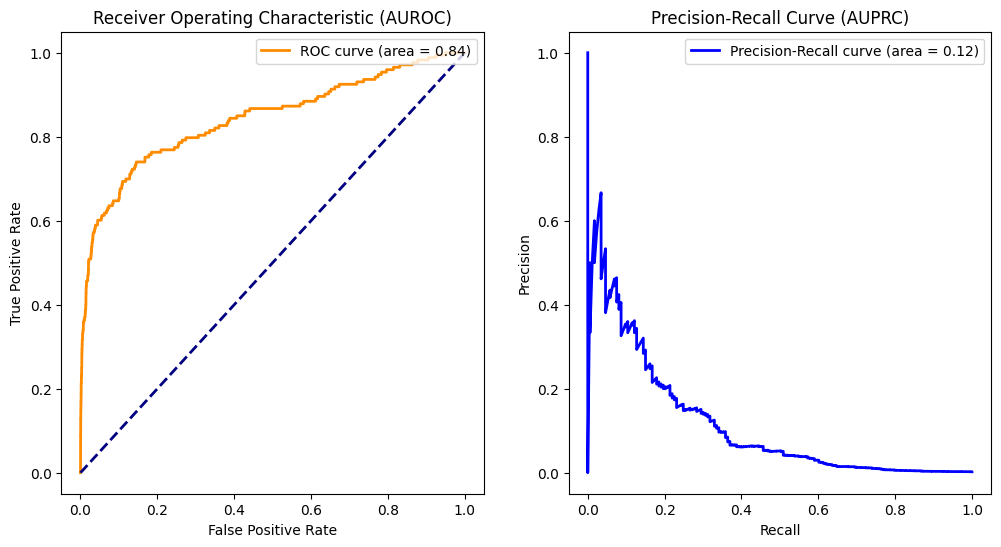

In [22]:
# Plot AUROC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUROC)')
plt.legend(loc="upper right")

# Plot AUPRC
plt.subplot(1, 2, 2)
plt.plot(recall_plt, precision_plt, color='blue',lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC)')
plt.legend(loc="upper right")

# Adjust layout
#plt.tight_layout()

# Show plots
plt.show()

#### Round 2 [Baseline]- Experiment with 0.25% sparsity of original HOT data - the data contains only offensive comments

In [2]:
baseline_train_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_train_final_.25%.csv')
baseline_test_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_test_final_.25%.csv')
baseline_validation_dataset = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_val_final_.25%.csv')

In [3]:
n_baseline_train= baseline_train_dataset.shape[0]
n_baseline_val= baseline_validation_dataset.shape[0]
n_baseline_test= baseline_test_dataset.shape[0]
n_baseline_train_toxic=baseline_train_dataset['label'].value_counts()[1]
n_baseline_val_toxic=baseline_validation_dataset['label'].value_counts()[1]
n_baseline_test_toxic=baseline_test_dataset['label'].value_counts()[1]
print(f"Baseline training dataset has {n_baseline_train} rows of which {n_baseline_train_toxic} are toxic")
print(f"Baseline validation dataset has {n_baseline_val} rows of which {n_baseline_val_toxic} are toxic")
print(f"Baseline test dataset has {n_baseline_test} rows of which {n_baseline_test_toxic} are toxic")

Baseline training dataset has 283685 rows of which 721 are toxic
Baseline validation dataset has 60791 rows of which 155 are toxic
Baseline test dataset has 60791 rows of which 155 are toxic


In [4]:
# Train
baseline_text_train= baseline_train_dataset['message']
baseline_label_train=baseline_train_dataset['label']

# Validation
baseline_text_val= baseline_validation_dataset['message']
baseline_label_val=baseline_validation_dataset['label']

# Test
baseline_text_test= baseline_test_dataset['message']
baseline_label_test=baseline_test_dataset['label']


In [5]:
# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
#vectorizer=TfidfVectorizer()
baseline_X_train = vectorizer.fit_transform(baseline_text_train)
baseline_X_validation = vectorizer.transform(baseline_text_val)
baseline_X_test = vectorizer.transform(baseline_text_test)


In [6]:
# Train baseline binary classifier

baseline_binary_classifier = LogisticRegression(max_iter=1000)
baseline_binary_classifier.fit(baseline_X_train, baseline_label_train)

LogisticRegression(max_iter=1000)

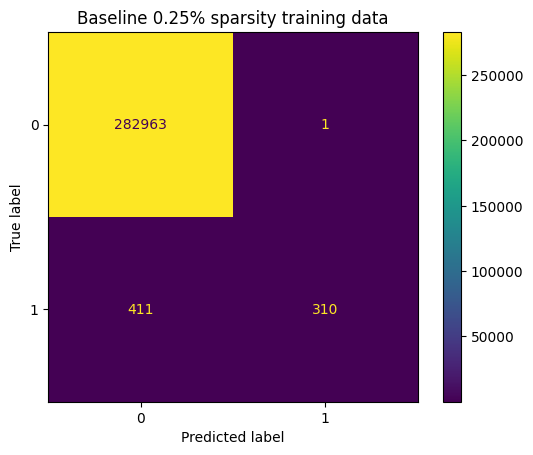

In [7]:
# Baseline Training set performance and confusion matrix

baseline_y_train_pred=baseline_binary_classifier.predict(baseline_X_train)
baseline_train_proba= baseline_binary_classifier.predict_proba(baseline_X_train)[:,1]

baseline_conf_matrix = confusion_matrix(baseline_label_train, baseline_y_train_pred)

cm_display_b = ConfusionMatrixDisplay(baseline_conf_matrix, display_labels = [0, 1])

cm_display_b.plot()
cm_display_b.ax_.set_title(f"Baseline 0.25% sparsity training data")
plt.show()

In [8]:
# Baseline Training Metrics

#Calculate accuracy
baseline_accuracy=accuracy_score(baseline_label_train, baseline_y_train_pred)
# Calculate F1 score
baseline_f1 = f1_score(baseline_label_train, baseline_y_train_pred)

# Calculate precision
baseline_precision = precision_score(baseline_label_train, baseline_y_train_pred)

# Calculate recall
baseline_recall = recall_score(baseline_label_train, baseline_y_train_pred)

baseline_precision_plt, baseline_recall_plt, _ = precision_recall_curve(baseline_label_train, baseline_train_proba)

# Calculate AUC-ROC and Average_precision_score
baseline_auc_roc= roc_auc_score(baseline_label_train, baseline_train_proba)

baseline_average_precision_score = average_precision_score(baseline_label_train, baseline_train_proba)

baseline_fpr, baseline_tpr, _ = roc_curve(baseline_label_train, baseline_train_proba)

# Print the results
data =[['0.25% Train',baseline_accuracy,baseline_f1,baseline_precision,baseline_recall,baseline_auc_roc,baseline_average_precision_score]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data, headers=headers, tablefmt="grid"))

+---------------+------------+------------+-------------+----------+----------+----------+
| Metric for:   |   Accuracy |   F1 score |   Precision |   Recall |    AUROC |    AUPRC |
+===============+============+============+=============+==========+==========+==========+
| 0.25% Train   |   0.998548 |   0.600775 |    0.996785 | 0.429958 | 0.997107 | 0.864763 |
+---------------+------------+------------+-------------+----------+----------+----------+


##### Baseline Validation Set

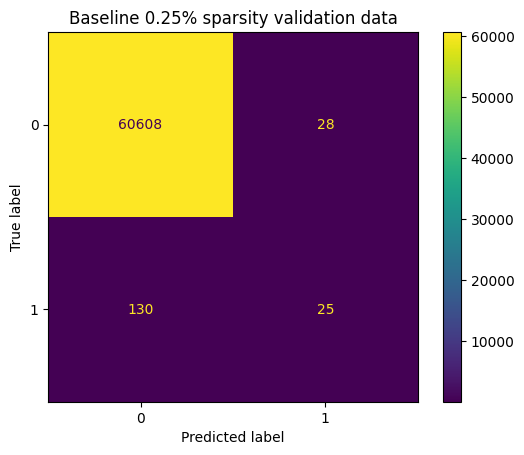

In [9]:

# Baseline Validation set performance and confusion matrix

baseline_y_val_pred=baseline_binary_classifier.predict(baseline_X_validation)
baseline_val_proba= baseline_binary_classifier.predict_proba(baseline_X_validation)[:,1]

baseline_conf_matrix_val = confusion_matrix(baseline_label_val, baseline_y_val_pred)

cm_display_val_b = ConfusionMatrixDisplay(baseline_conf_matrix_val, display_labels = [0, 1])

cm_display_val_b.plot()
cm_display_val_b.ax_.set_title(f"Baseline 0.25% sparsity validation data")
plt.show()

In [10]:
# Baseline Validation Metrics

#Calculate accuracy
baseline_accuracy_val=accuracy_score(baseline_label_val, baseline_y_val_pred)
# Calculate F1 score
baseline_f1_val = f1_score(baseline_label_val, baseline_y_val_pred)

# Calculate precision
baseline_precision_val = precision_score(baseline_label_val, baseline_y_val_pred)

# Calculate recall
baseline_recall_val = recall_score(baseline_label_val, baseline_y_val_pred)

baseline_precision_val_plt, baseline_recall_val_plt, _ = precision_recall_curve(baseline_label_val, baseline_val_proba)

# Calculate AUC-ROC and Average_precision_score
baseline_auc_roc_val= roc_auc_score(baseline_label_val, baseline_val_proba)

baseline_average_precision_score_val = average_precision_score(baseline_label_val, baseline_val_proba)

baseline_fpr_val, baseline_tpr_val, _ = roc_curve(baseline_label_val, baseline_val_proba)

# Print the results
data_val =[['0.25% Validation',baseline_accuracy_val,baseline_f1_val,baseline_precision_val,baseline_recall_val,baseline_auc_roc_val,baseline_average_precision_score_val]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_val, headers=headers, tablefmt="fancy_grid"))

╒══════════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:      │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞══════════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 0.25% Validation │   0.997401 │   0.240385 │    0.471698 │  0.16129 │ 0.895899 │ 0.195679 │
╘══════════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


##### Baseline Test

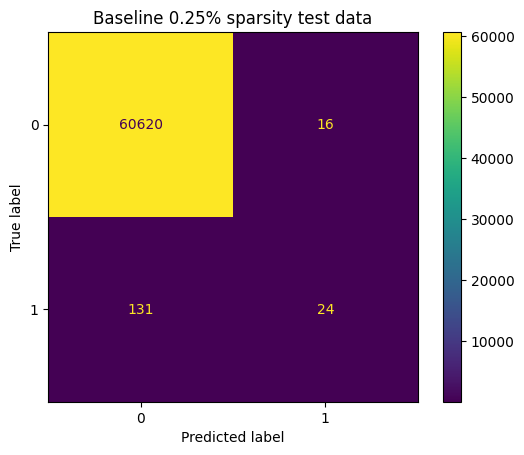

In [11]:

# Baseline Test set performance and confusion matrix

baseline_y_test_pred=baseline_binary_classifier.predict(baseline_X_test)
baseline_test_proba= baseline_binary_classifier.predict_proba(baseline_X_test)[:,1]

baseline_conf_matrix_test = confusion_matrix(baseline_label_test, baseline_y_test_pred)

cm_display_test_b = ConfusionMatrixDisplay(baseline_conf_matrix_test, display_labels = [0, 1])

cm_display_test_b.plot()
cm_display_test_b.ax_.set_title(f"Baseline 0.25% sparsity test data")
plt.show()

In [12]:
# Baseline Test Metrics

#Calculate accuracy
baseline_accuracy_test=accuracy_score(baseline_label_test, baseline_y_test_pred)
# Calculate F1 score
baseline_f1_test = f1_score(baseline_label_test, baseline_y_test_pred)

# Calculate precision
baseline_precision_test = precision_score(baseline_label_test, baseline_y_test_pred)

# Calculate recall
baseline_recall_test = recall_score(baseline_label_test, baseline_y_test_pred)

baseline_precision_test_plt, baseline_recall_test_plt, _ = precision_recall_curve(baseline_label_test, baseline_test_proba)

# Calculate AUC-ROC and Average_precision_score
baseline_auc_roc_test= roc_auc_score(baseline_label_test, baseline_test_proba)

baseline_average_precision_score_test = average_precision_score(baseline_label_test, baseline_test_proba)

baseline_fpr_test, baseline_tpr_test, _ = roc_curve(baseline_label_test, baseline_test_proba)

# Print the results
data_test =[['0.25% Test',baseline_accuracy_test,baseline_f1_test,baseline_precision_test,
             baseline_recall_test,baseline_auc_roc_test,baseline_average_precision_score_test]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_test, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 0.25% Test    │   0.997582 │   0.246154 │         0.6 │ 0.154839 │ 0.910372 │ 0.237274 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


In [13]:
# Combined Metrics
comb=data+data_val+data_test
baseline_metrics= pd.DataFrame(comb,columns=headers)
baseline_metrics

,Metric for:,Accuracy,F1 score,Precision,Recall,AUROC,AUPRC
0,0.25% Train,0.998548,0.600775,0.996785,0.429958,0.997107,0.864763
1,0.25% Validation,0.997401,0.240385,0.471698,0.161290,0.895899,0.195679
2,0.25% Test,0.997582,0.246154,0.600000,0.154839,0.910372,0.237274


#### Round 3 - Experiment with 1% sparsity. We are now adding synthetic data

In [15]:
train_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_train_final_1%.csv')
test_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_test_final_1%.csv')
validation_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_val_final_1%.csv')

In [16]:
n_train_1_percent= train_dataset_1_percent.shape[0]
n_val_1_percent= validation_dataset_1_percent.shape[0]
n_test_1_percent= test_dataset_1_percent.shape[0]
n_1_percent_train_toxic=train_dataset_1_percent['label'].value_counts()[1]
n_1_percent_val_toxic=validation_dataset_1_percent['label'].value_counts()[1]
n_1_percent_test_toxic=test_dataset_1_percent['label'].value_counts()[1]
print(f"1% sparsity training dataset has {n_train_1_percent} rows")
print(f"1% sparsity dataset has {n_val_1_percent} rows")
print(f"1% sparsity test dataset has {n_test_1_percent} rows")

1% sparsity training dataset has 283685 rows
1% sparsity dataset has 60791 rows
1% sparsity test dataset has 60791 rows


In [17]:
# Train
text_train_1_percent= train_dataset_1_percent['message']
label_train_1_percent=train_dataset_1_percent['label']

# Validation
text_val_1_percent= validation_dataset_1_percent['message']
label_val_1_percent=validation_dataset_1_percent['label']

# Test
text_test_1_percent= test_dataset_1_percent['message']
label_test_1_percent=test_dataset_1_percent['label']


In [19]:
# Convert the text to a bag-of-words representation
X_train_1_percent = vectorizer.fit_transform(text_train_1_percent)
X_validation_1_percent = vectorizer.transform(text_val_1_percent)
X_test_1_percent = vectorizer.transform(text_test_1_percent)

In [20]:
# Train new model binary classifier with 1% sparsity dataset

binary_classifier_1_percent = LogisticRegression(max_iter=1000)
binary_classifier_1_percent.fit(X_train_1_percent, label_train_1_percent)

LogisticRegression(max_iter=1000)

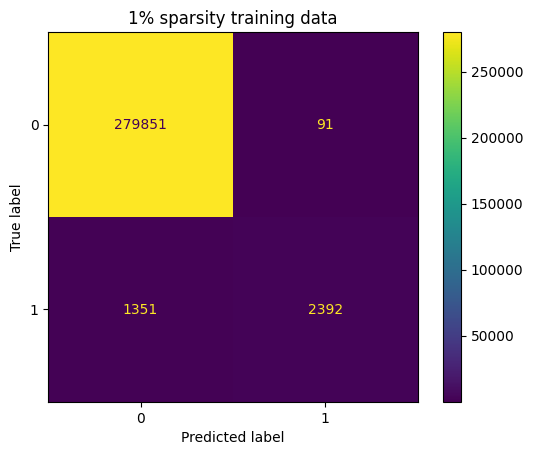

In [21]:

# Baseline Validation set performance and confusion matrix

y_train_pred_1_percent=binary_classifier_1_percent.predict(X_train_1_percent)
train_proba_1_percent= binary_classifier_1_percent.predict_proba(X_train_1_percent)[:,1]

conf_matrix_train_1_percent = confusion_matrix(label_train_1_percent, y_train_pred_1_percent)

cm_display_train = ConfusionMatrixDisplay(conf_matrix_train_1_percent, display_labels = [0, 1])

cm_display_train.plot()
cm_display_train.ax_.set_title(f"1% sparsity training data")
plt.show()

In [22]:
# 1% sparsity Validation Metrics

#Calculate accuracy
accuracy_train_1_pct=accuracy_score(label_train_1_percent, y_train_pred_1_percent)
# Calculate F1 score
f1_train_1_pct = f1_score(label_train_1_percent, y_train_pred_1_percent)

# Calculate precision
precision_train_1_pct = precision_score(label_train_1_percent, y_train_pred_1_percent)

# Calculate recall
recall_train_1_pct = recall_score(label_train_1_percent, y_train_pred_1_percent)

precision_train_1_pct_plt, recall_val_1_pct_plt, _ = precision_recall_curve(label_train_1_percent, train_proba_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_train_1_pct= roc_auc_score(label_train_1_percent, train_proba_1_percent)

average_precision_score_train_1_pct = average_precision_score(label_train_1_percent, train_proba_1_percent)

fpr_train_1_pct, tpr_train_1_pct, _ = roc_curve(label_train_1_percent, train_proba_1_percent)

# Print the results
data_train_1_pct =[['1% Training',accuracy_train_1_pct,f1_train_1_pct,precision_train_1_pct,recall_train_1_pct,auc_roc_train_1_pct,average_precision_score_train_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_train_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Training   │   0.994917 │   0.768391 │    0.963351 │  0.63906 │ 0.993629 │ 0.897487 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


##### Validation Set

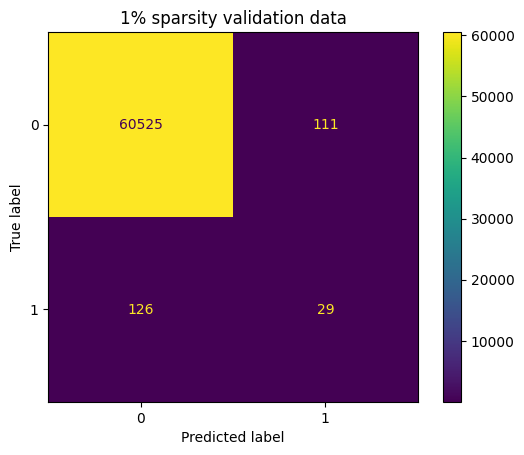

In [30]:

# Baseline Validation set performance and confusion matrix

y_val_pred_1_percent=binary_classifier_1_percent.predict(X_validation_1_percent)
val_proba_1_percent= binary_classifier_1_percent.predict_proba(X_validation_1_percent)[:,1]

conf_matrix_val_1_percent = confusion_matrix(label_val_1_percent, y_val_pred_1_percent)

cm_display_val = ConfusionMatrixDisplay(conf_matrix_val_1_percent, display_labels = [0, 1])

cm_display_val.plot()
cm_display_val.ax_.set_title(f"1% sparsity validation data")
plt.show()

In [31]:
# 1% sparsity Validation Metrics

#Calculate accuracy
accuracy_val_1_pct=accuracy_score(label_val_1_percent, y_val_pred_1_percent)
# Calculate F1 score
f1_1_pct = f1_score(label_val_1_percent, y_val_pred_1_percent)

# Calculate precision
precision_val_1_pct = precision_score(label_val_1_percent, y_val_pred_1_percent)

# Calculate recall
recall_val_1_pct = recall_score(label_val_1_percent, y_val_pred_1_percent)

precision_val_1_pct_plt, recall_val_1_pct_plt, _ = precision_recall_curve(label_val_1_percent, val_proba_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_val_1_pct= roc_auc_score(label_val_1_percent, val_proba_1_percent)

average_precision_score_val_1_pct = average_precision_score(label_val_1_percent, val_proba_1_percent)

fpr_val_1_pct, tpr_val_1_pct, _ = roc_curve(label_val_1_percent, val_proba_1_percent)

# Print the results
data_val_1_pct =[['1% Validation',accuracy_val_1_pct,f1_1_pct,precision_val_1_pct,recall_val_1_pct,auc_roc_val_1_pct,average_precision_score_val_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_val_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Validation │   0.996101 │    0.19661 │    0.207143 │ 0.187097 │ 0.822806 │ 0.102234 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


##### Test Set

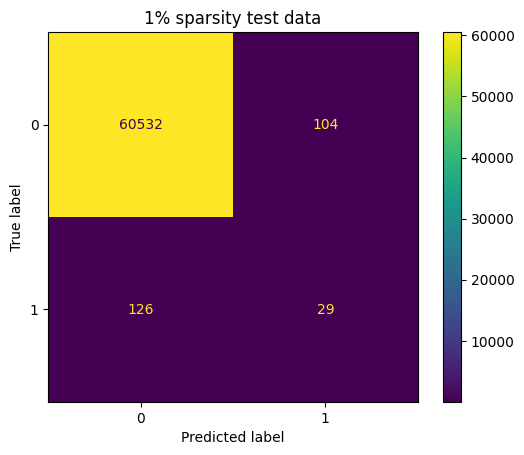

In [32]:
# Baseline Validation set performance and confusion matrix

y_test_pred_1_percent=binary_classifier_1_percent.predict(X_test_1_percent)
test_proba_1_percent= binary_classifier_1_percent.predict_proba(X_test_1_percent)[:,1]

conf_matrix_test_1_percent = confusion_matrix(label_test_1_percent, y_test_pred_1_percent)

cm_display_test = ConfusionMatrixDisplay(conf_matrix_test_1_percent, display_labels = [0, 1])

cm_display_test.plot()
cm_display_test.ax_.set_title(f"1% sparsity test data")
plt.show()

In [34]:
# 1% sparsity Test Metrics

#Calculate accuracy
accuracy_test_1_pct=accuracy_score(label_test_1_percent, y_test_pred_1_percent)
# Calculate F1 score
f1_test_1_pct = f1_score(label_test_1_percent, y_test_pred_1_percent)

# Calculate precision
precision_test_1_pct = precision_score(label_test_1_percent, y_test_pred_1_percent)

# Calculate recall
recall_test_1_pct = recall_score(label_test_1_percent, y_test_pred_1_percent)

precision_test_1_pct_plt, recall_test_1_pct_plt, _ = precision_recall_curve(label_test_1_percent, y_test_pred_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_test_1_pct= roc_auc_score(label_test_1_percent, test_proba_1_percent)

average_precision_score_test_1_pct = average_precision_score(label_test_1_percent, test_proba_1_percent)

fpr_test_1_pct, tpr_test_1_pct, _ = roc_curve(label_test_1_percent, test_proba_1_percent)

# Print the results
data_test_1_pct =[['1% Test',accuracy_test_1_pct,f1_test_1_pct,precision_test_1_pct,recall_test_1_pct,auc_roc_test_1_pct,average_precision_score_test_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_test_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Test       │   0.996217 │   0.201389 │    0.218045 │ 0.187097 │ 0.875043 │ 0.119085 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


#### Round 3 - Experiment with 1% sparsity. We are now adding synthetic data

In [ ]:
train_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_train_final_1%.csv')
test_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_test_final_1%.csv')
validation_dataset_1_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_val_final_1%.csv')

In [77]:
n_train_1_percent= train_dataset_1_percent.shape[0]
n_val_1_percent= validation_dataset_1_percent.shape[0]
n_test_1_percent= test_dataset_1_percent.shape[0]
n_1_percent_train_toxic=train_dataset_1_percent['label'].value_counts()[1]
n_1_percent_val_toxic=validation_dataset_1_percent['label'].value_counts()[1]
n_1_percent_test_toxic=test_dataset_1_percent['label'].value_counts()[1]
print(f"1% sparsity training dataset has {n_train_1_percent} rows and {n_1_percent_train_toxic} toxic rows")
print(f"1% sparsity val dataset has {n_val_1_percent} rows and {n_1_percent_val_toxic} toxic")
print(f"1% sparsity test dataset has {n_test_1_percent} rows and {n_1_percent_test_toxic} toxic")

1% sparsity training dataset has 283685 rows and 3743 toxic rows
1% sparsity val dataset has 60791 rows and 155 toxic
1% sparsity test dataset has 60791 rows and 155 toxic


In [ ]:
# Train
text_train_1_percent= train_dataset_1_percent['message']
label_train_1_percent=train_dataset_1_percent['label']

# Validation
text_val_1_percent= validation_dataset_1_percent['message']
label_val_1_percent=validation_dataset_1_percent['label']

# Test
text_test_1_percent= test_dataset_1_percent['message']
label_test_1_percent=test_dataset_1_percent['label']


In [ ]:
# Convert the text to a bag-of-words representation
X_train_1_percent = vectorizer.fit_transform(text_train_1_percent)
X_validation_1_percent = vectorizer.transform(text_val_1_percent)
X_test_1_percent = vectorizer.transform(text_test_1_percent)

In [ ]:
# Train new model binary classifier with 1% sparsity dataset

binary_classifier_1_percent = LogisticRegression(max_iter=1000)
binary_classifier_1_percent.fit(X_train_1_percent, label_train_1_percent)

LogisticRegression(max_iter=1000)

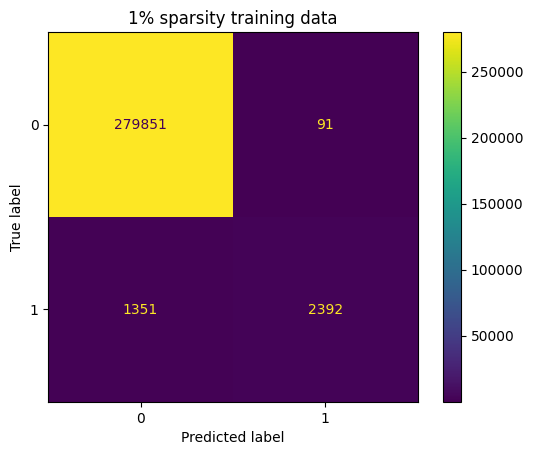

In [ ]:

# Baseline Validation set performance and confusion matrix

y_train_pred_1_percent=binary_classifier_1_percent.predict(X_train_1_percent)
train_proba_1_percent= binary_classifier_1_percent.predict_proba(X_train_1_percent)[:,1]

conf_matrix_train_1_percent = confusion_matrix(label_train_1_percent, y_train_pred_1_percent)

cm_display_train = ConfusionMatrixDisplay(conf_matrix_train_1_percent, display_labels = [0, 1])

cm_display_train.plot()
cm_display_train.ax_.set_title(f"1% sparsity training data")
plt.show()

In [ ]:
# 1% sparsity Validation Metrics

#Calculate accuracy
accuracy_train_1_pct=accuracy_score(label_train_1_percent, y_train_pred_1_percent)
# Calculate F1 score
f1_train_1_pct = f1_score(label_train_1_percent, y_train_pred_1_percent)

# Calculate precision
precision_train_1_pct = precision_score(label_train_1_percent, y_train_pred_1_percent)

# Calculate recall
recall_train_1_pct = recall_score(label_train_1_percent, y_train_pred_1_percent)

precision_train_1_pct_plt, recall_val_1_pct_plt, _ = precision_recall_curve(label_train_1_percent, train_proba_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_train_1_pct= roc_auc_score(label_train_1_percent, train_proba_1_percent)

average_precision_score_train_1_pct = average_precision_score(label_train_1_percent, train_proba_1_percent)

fpr_train_1_pct, tpr_train_1_pct, _ = roc_curve(label_train_1_percent, train_proba_1_percent)

# Print the results
data_train_1_pct =[['1% Training',accuracy_train_1_pct,f1_train_1_pct,precision_train_1_pct,recall_train_1_pct,auc_roc_train_1_pct,average_precision_score_train_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_train_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Training   │   0.994917 │   0.768391 │    0.963351 │  0.63906 │ 0.993629 │ 0.897487 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


##### Validation Set

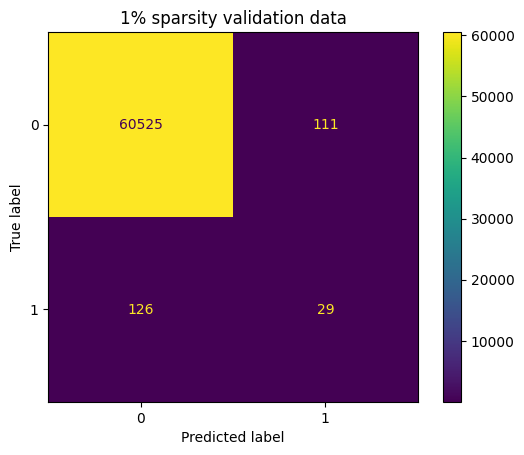

In [ ]:

# Baseline Validation set performance and confusion matrix

y_val_pred_1_percent=binary_classifier_1_percent.predict(X_validation_1_percent)
val_proba_1_percent= binary_classifier_1_percent.predict_proba(X_validation_1_percent)[:,1]

conf_matrix_val_1_percent = confusion_matrix(label_val_1_percent, y_val_pred_1_percent)

cm_display_val = ConfusionMatrixDisplay(conf_matrix_val_1_percent, display_labels = [0, 1])

cm_display_val.plot()
cm_display_val.ax_.set_title(f"1% sparsity validation data")
plt.show()

In [ ]:
# 1% sparsity Validation Metrics

#Calculate accuracy
accuracy_val_1_pct=accuracy_score(label_val_1_percent, y_val_pred_1_percent)
# Calculate F1 score
f1_1_pct = f1_score(label_val_1_percent, y_val_pred_1_percent)

# Calculate precision
precision_val_1_pct = precision_score(label_val_1_percent, y_val_pred_1_percent)

# Calculate recall
recall_val_1_pct = recall_score(label_val_1_percent, y_val_pred_1_percent)

precision_val_1_pct_plt, recall_val_1_pct_plt, _ = precision_recall_curve(label_val_1_percent, val_proba_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_val_1_pct= roc_auc_score(label_val_1_percent, val_proba_1_percent)

average_precision_score_val_1_pct = average_precision_score(label_val_1_percent, val_proba_1_percent)

fpr_val_1_pct, tpr_val_1_pct, _ = roc_curve(label_val_1_percent, val_proba_1_percent)

# Print the results
data_val_1_pct =[['1% Validation',accuracy_val_1_pct,f1_1_pct,precision_val_1_pct,recall_val_1_pct,auc_roc_val_1_pct,average_precision_score_val_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_val_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Validation │   0.996101 │    0.19661 │    0.207143 │ 0.187097 │ 0.822806 │ 0.102234 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


##### Test Set

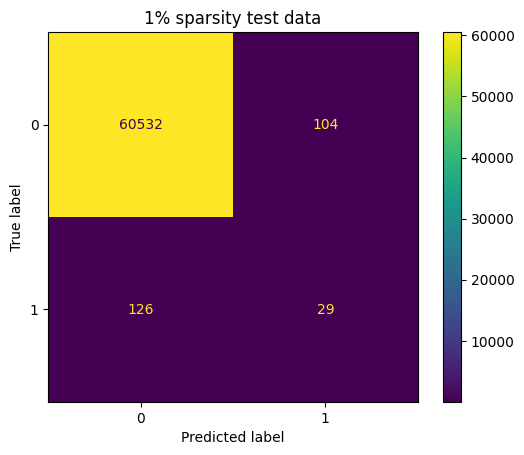

In [ ]:
# Baseline Validation set performance and confusion matrix

y_test_pred_1_percent=binary_classifier_1_percent.predict(X_test_1_percent)
test_proba_1_percent= binary_classifier_1_percent.predict_proba(X_test_1_percent)[:,1]

conf_matrix_test_1_percent = confusion_matrix(label_test_1_percent, y_test_pred_1_percent)

cm_display_test = ConfusionMatrixDisplay(conf_matrix_test_1_percent, display_labels = [0, 1])

cm_display_test.plot()
cm_display_test.ax_.set_title(f"1% sparsity test data")
plt.show()

In [ ]:
# 1% sparsity Test Metrics

#Calculate accuracy
accuracy_test_1_pct=accuracy_score(label_test_1_percent, y_test_pred_1_percent)
# Calculate F1 score
f1_test_1_pct = f1_score(label_test_1_percent, y_test_pred_1_percent)

# Calculate precision
precision_test_1_pct = precision_score(label_test_1_percent, y_test_pred_1_percent)

# Calculate recall
recall_test_1_pct = recall_score(label_test_1_percent, y_test_pred_1_percent)

precision_test_1_pct_plt, recall_test_1_pct_plt, _ = precision_recall_curve(label_test_1_percent, y_test_pred_1_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_test_1_pct= roc_auc_score(label_test_1_percent, test_proba_1_percent)

average_precision_score_test_1_pct = average_precision_score(label_test_1_percent, test_proba_1_percent)

fpr_test_1_pct, tpr_test_1_pct, _ = roc_curve(label_test_1_percent, test_proba_1_percent)

# Print the results
data_test_1_pct =[['1% Test',accuracy_test_1_pct,f1_test_1_pct,precision_test_1_pct,recall_test_1_pct,auc_roc_test_1_pct,average_precision_score_test_1_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_test_1_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Test       │   0.996217 │   0.201389 │    0.218045 │ 0.187097 │ 0.875043 │ 0.119085 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


#### Round 4 - Experiment with 5% sparsity. We are now adding synthetic data

In [41]:
train_dataset_5_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_train_final_5%.csv')
test_dataset_5_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_test_final_5%.csv')
validation_dataset_5_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_val_final_5%.csv')

In [61]:
n_train_5_percent= train_dataset_5_percent.shape[0]
n_val_5_percent= validation_dataset_5_percent.shape[0]
n_test_5_percent= test_dataset_5_percent.shape[0]
n_5_percent_train_toxic=train_dataset_5_percent['label'].value_counts()[1]
n_5_percent_val_toxic=validation_dataset_5_percent['label'].value_counts()[1]
n_5_percent_test_toxic=test_dataset_5_percent['label'].value_counts()[1]
print(f"5% sparsity training dataset has {n_train_5_percent} rows")
print(f"5% sparsity dataset has {n_val_5_percent} rows")
print(f"5% sparsity test dataset has {n_test_5_percent} rows")

5% sparsity training dataset has 283685 rows
5% sparsity dataset has 60791 rows
5% sparsity test dataset has 60791 rows


In [62]:
# Train
text_train_5_percent= train_dataset_5_percent['message']
label_train_5_percent=train_dataset_5_percent['label']

# Validation
text_val_5_percent= validation_dataset_5_percent['message']
label_val_5_percent=validation_dataset_5_percent['label']

# Test
text_test_5_percent= test_dataset_5_percent['message']
label_test_5_percent=test_dataset_5_percent['label']


In [63]:
# Convert the text to a bag-of-words representation
X_train_5_percent = vectorizer.fit_transform(text_train_5_percent)
X_validation_5_percent = vectorizer.transform(text_val_5_percent)
X_test_5_percent = vectorizer.transform(text_test_5_percent)

In [64]:
# Train new model binary classifier with 1% sparsity dataset

binary_classifier_5_percent = LogisticRegression(max_iter=1000)
binary_classifier_5_percent.fit(X_train_5_percent, label_train_5_percent)

LogisticRegression(max_iter=1000)

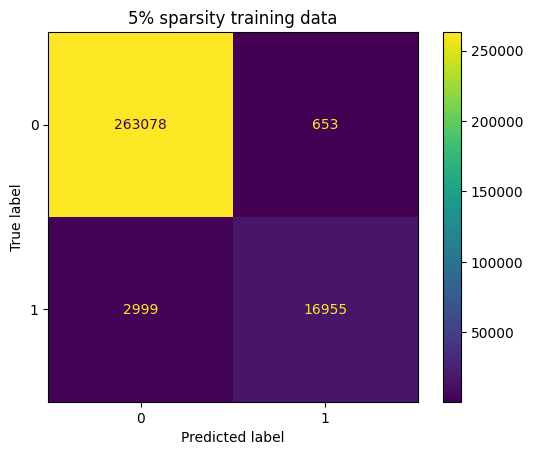

In [65]:

# Train set performance and confusion matrix

y_train_pred_5_percent=binary_classifier_5_percent.predict(X_train_5_percent)
train_proba_5_percent= binary_classifier_5_percent.predict_proba(X_train_5_percent)[:,1]

conf_matrix_train_5_percent = confusion_matrix(label_train_5_percent, y_train_pred_5_percent)

cm_display_train_5 = ConfusionMatrixDisplay(conf_matrix_train_5_percent, display_labels = [0, 1])

cm_display_train_5.plot()
cm_display_train_5.ax_.set_title(f"5% sparsity training data")
plt.show()

In [66]:
# 5% sparsity Validation Metrics

#Calculate accuracy
accuracy_train_5_pct=accuracy_score(label_train_5_percent, y_train_pred_5_percent)
# Calculate F1 score
f1_train_5_pct = f1_score(label_train_5_percent, y_train_pred_5_percent)

# Calculate precision
precision_train_5_pct = precision_score(label_train_5_percent, y_train_pred_5_percent)

# Calculate recall
recall_train_5_pct = recall_score(label_train_5_percent, y_train_pred_5_percent)

precision_train_5_pct_plt, recall_val_5_pct_plt, _ = precision_recall_curve(label_train_5_percent, train_proba_5_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_train_5_pct= roc_auc_score(label_train_5_percent, train_proba_5_percent)

average_precision_score_train_5_pct = average_precision_score(label_train_5_percent, train_proba_5_percent)

fpr_train_5_pct, tpr_train_5_pct, _ = roc_curve(label_train_5_percent, train_proba_5_percent)

# Print the results
data_train_5_pct =[['5% Training',accuracy_train_5_pct,f1_train_5_pct,precision_train_5_pct,recall_train_5_pct,auc_roc_train_5_pct,average_precision_score_train_5_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_train_5_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤═════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │   AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪═════════╪══════════╡
│ 5% Training   │   0.987127 │   0.902774 │    0.962915 │ 0.849704 │ 0.99448 │ 0.965076 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧═════════╧══════════╛


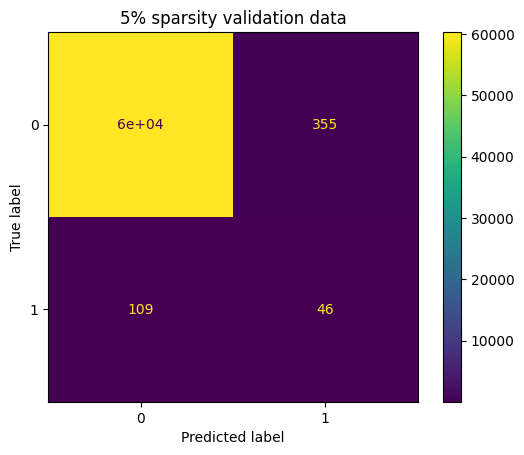

In [67]:

# Baseline Validation set performance and confusion matrix

y_val_pred_5_percent=binary_classifier_5_percent.predict(X_validation_5_percent)
val_proba_5_percent= binary_classifier_5_percent.predict_proba(X_validation_5_percent)[:,1]

conf_matrix_val_5_percent = confusion_matrix(label_val_5_percent, y_val_pred_5_percent)

cm_display_val_5 = ConfusionMatrixDisplay(conf_matrix_val_5_percent, display_labels = [0, 1])

cm_display_val_5.plot()
cm_display_val_5.ax_.set_title(f"5% sparsity validation data")
plt.show()

In [68]:
# 5% sparsity Validation Metrics

#Calculate accuracy
accuracy_val_5_pct=accuracy_score(label_val_5_percent, y_val_pred_5_percent)
# Calculate F1 score
f1_5_pct = f1_score(label_val_5_percent, y_val_pred_5_percent)

# Calculate precision
precision_val_5_pct = precision_score(label_val_5_percent, y_val_pred_5_percent)

# Calculate recall
recall_val_5_pct = recall_score(label_val_5_percent, y_val_pred_5_percent)

precision_val_5_pct_plt, recall_val_5_pct_plt, _ = precision_recall_curve(label_val_5_percent, val_proba_5_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_val_5_pct= roc_auc_score(label_val_5_percent, val_proba_5_percent)

average_precision_score_val_5_pct = average_precision_score(label_val_5_percent, val_proba_5_percent)

fpr_val_5_pct, tpr_val_5_pct, _ = roc_curve(label_val_5_percent, val_proba_5_percent)

# Print the results
data_val_5_pct =[['5% Validation',accuracy_val_5_pct,f1_5_pct,precision_val_5_pct,recall_val_5_pct,auc_roc_val_5_pct,average_precision_score_val_5_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_val_5_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 5% Validation │   0.992367 │   0.165468 │    0.114713 │ 0.296774 │ 0.830059 │ 0.089508 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


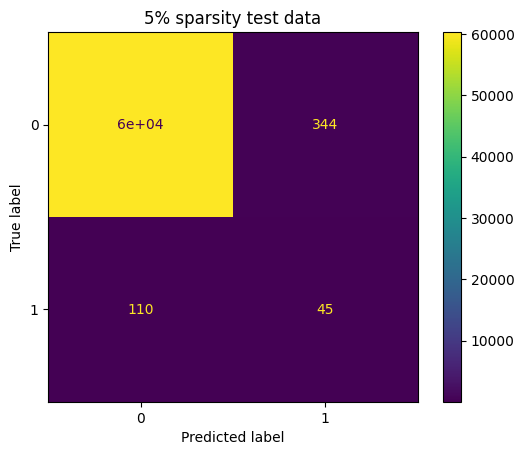

In [69]:
# Baseline Validation set performance and confusion matrix

y_test_pred_5_percent=binary_classifier_5_percent.predict(X_test_5_percent)
test_proba_5_percent= binary_classifier_5_percent.predict_proba(X_test_5_percent)[:,1]

conf_matrix_test_5_percent = confusion_matrix(label_test_5_percent, y_test_pred_5_percent)

cm_display_test_5 = ConfusionMatrixDisplay(conf_matrix_test_5_percent, display_labels = [0, 1])

cm_display_test_5.plot()
cm_display_test_5.ax_.set_title(f"5% sparsity test data")
plt.show()

In [71]:
# 5% sparsity Test Metrics

#Calculate accuracy
accuracy_test_5_pct=accuracy_score(label_test_5_percent, y_test_pred_5_percent)
# Calculate F1 score
f1_test_5_pct = f1_score(label_test_5_percent, y_test_pred_5_percent)

# Calculate precision
precision_test_5_pct = precision_score(label_test_5_percent, y_test_pred_5_percent)

# Calculate recall
recall_test_5_pct = recall_score(label_test_5_percent, y_test_pred_5_percent)

precision_test_5_pct_plt, recall_test_5_pct_plt, _ = precision_recall_curve(label_test_5_percent, y_test_pred_5_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_test_5_pct= roc_auc_score(label_test_5_percent, test_proba_5_percent)

average_precision_score_test_5_pct = average_precision_score(label_test_5_percent, test_proba_5_percent)

fpr_test_5_pct, tpr_test_5_pct, _ = roc_curve(label_test_5_percent, test_proba_5_percent)

# Print the results
data_test_5_pct =[['5% Test',accuracy_test_5_pct,f1_test_5_pct,precision_test_5_pct,recall_test_5_pct,auc_roc_test_5_pct,average_precision_score_test_5_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_test_5_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │     AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════╡
│ 5% Test       │   0.992532 │   0.165441 │    0.115681 │ 0.290323 │ 0.868076 │ 0.0964124 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧═══════════╛


#### Round 5 - Experiment with 3% sparsity. We are now adding synthetic data

In [87]:
train_dataset_3_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_train_final_3%.csv')
test_dataset_3_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_test_final_3%.csv')
validation_dataset_3_percent = pd.read_csv('../ScratchPad/Meta_synthetic_toxic_data/RRAVIPRA_val_final_3%.csv')

In [88]:
n_train_3_percent= train_dataset_3_percent.shape[0]
n_val_3_percent= validation_dataset_3_percent.shape[0]
n_test_3_percent= test_dataset_3_percent.shape[0]
n_3_percent_train_toxic=train_dataset_3_percent['label'].value_counts()[1]
n_3_percent_val_toxic=validation_dataset_3_percent['label'].value_counts()[1]
n_3_percent_test_toxic=test_dataset_3_percent['label'].value_counts()[1]
print(f"3% sparsity training dataset has {n_train_3_percent} rows")
print(f"3% sparsity dataset has {n_val_3_percent} rows")
print(f"3% sparsity test dataset has {n_test_3_percent} rows")

3% sparsity training dataset has 283685 rows
3% sparsity dataset has 60791 rows
3% sparsity test dataset has 60791 rows


In [89]:
# Train
text_train_3_percent= train_dataset_3_percent['message']
label_train_3_percent=train_dataset_3_percent['label']

# Validation
text_val_3_percent= validation_dataset_3_percent['message']
label_val_3_percent=validation_dataset_3_percent['label']

# Test
text_test_3_percent= test_dataset_3_percent['message']
label_test_3_percent=test_dataset_3_percent['label']


In [90]:
# Convert the text to a bag-of-words representation
X_train_3_percent = vectorizer.fit_transform(text_train_3_percent)
X_validation_3_percent = vectorizer.transform(text_val_3_percent)
X_test_3_percent = vectorizer.transform(text_test_3_percent)

In [91]:
# Train new model binary classifier with 1% sparsity dataset

binary_classifier_3_percent = LogisticRegression(max_iter=1000)
binary_classifier_3_percent.fit(X_train_3_percent, label_train_3_percent)

LogisticRegression(max_iter=1000)

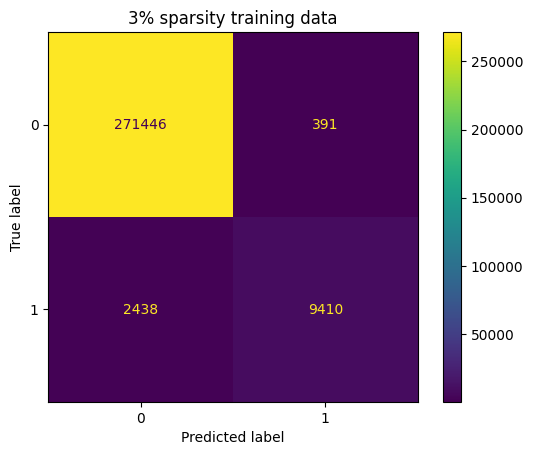

In [92]:
# Baseline Validation set performance and confusion matrix

y_train_pred_3_percent=binary_classifier_3_percent.predict(X_train_3_percent)
train_proba_3_percent= binary_classifier_3_percent.predict_proba(X_train_3_percent)[:,1]

conf_matrix_train_3_percent = confusion_matrix(label_train_3_percent, y_train_pred_3_percent)

cm_display_train_3 = ConfusionMatrixDisplay(conf_matrix_train_3_percent, display_labels = [0, 1])

cm_display_train_3.plot()
cm_display_train_3.ax_.set_title(f"3% sparsity training data")
plt.show()

In [94]:
# 3% sparsity Validation Metrics

#Calculate accuracy
accuracy_train_3_pct=accuracy_score(label_train_3_percent, y_train_pred_3_percent)
# Calculate F1 score
f1_train_3_pct = f1_score(label_train_3_percent, y_train_pred_3_percent)

# Calculate precision
precision_train_3_pct = precision_score(label_train_3_percent, y_train_pred_3_percent)

# Calculate recall
recall_train_3_pct = recall_score(label_train_3_percent, y_train_pred_3_percent)

precision_train_3_pct_plt, recall_val_3_pct_plt, _ = precision_recall_curve(label_train_3_percent, train_proba_3_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_train_3_pct= roc_auc_score(label_train_3_percent, train_proba_3_percent)

average_precision_score_train_3_pct = average_precision_score(label_train_3_percent, train_proba_3_percent)

fpr_train_3_pct, tpr_train_3_pct, _ = roc_curve(label_train_3_percent, train_proba_3_percent)

# Print the results
data_train_3_pct =[['3% Training',accuracy_train_3_pct,f1_train_3_pct,precision_train_3_pct,recall_train_3_pct,auc_roc_train_3_pct,average_precision_score_train_3_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_train_3_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 3% Training   │   0.990028 │   0.869324 │    0.960106 │ 0.794227 │ 0.993772 │ 0.947602 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


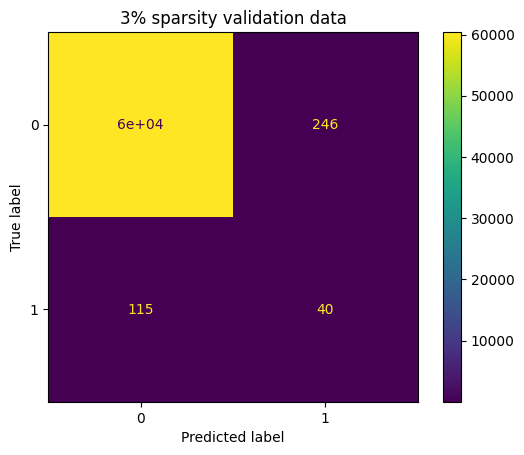

In [96]:

# Baseline Validation set performance and confusion matrix

y_val_pred_3_percent=binary_classifier_3_percent.predict(X_validation_3_percent)
val_proba_3_percent= binary_classifier_3_percent.predict_proba(X_validation_3_percent)[:,1]

conf_matrix_val_3_percent = confusion_matrix(label_val_3_percent, y_val_pred_3_percent)

cm_display_val_3 = ConfusionMatrixDisplay(conf_matrix_val_3_percent, display_labels = [0, 1])

cm_display_val_3.plot()
cm_display_val_3.ax_.set_title(f"3% sparsity validation data")
plt.show()

In [97]:
# 3% sparsity Validation Metrics

#Calculate accuracy
accuracy_val_3_pct=accuracy_score(label_val_3_percent, y_val_pred_3_percent)
# Calculate F1 score
f1_3_pct = f1_score(label_val_3_percent, y_val_pred_3_percent)

# Calculate precision
precision_val_3_pct = precision_score(label_val_3_percent, y_val_pred_3_percent)

# Calculate recall
recall_val_3_pct = recall_score(label_val_3_percent, y_val_pred_3_percent)

precision_val_3_pct_plt, recall_val_3_pct_plt, _ = precision_recall_curve(label_val_3_percent, val_proba_3_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_val_3_pct= roc_auc_score(label_val_3_percent, val_proba_3_percent)

average_precision_score_val_3_pct = average_precision_score(label_val_3_percent, val_proba_3_percent)

fpr_val_3_pct, tpr_val_3_pct, _ = roc_curve(label_val_3_percent, val_proba_3_percent)

# Print the results
data_val_3_pct =[['3% Validation',accuracy_val_3_pct,f1_3_pct,precision_val_3_pct,recall_val_3_pct,auc_roc_val_3_pct,average_precision_score_val_3_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_val_3_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │     AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════╡
│ 3% Validation │   0.994062 │   0.181406 │     0.13986 │ 0.258065 │ 0.827805 │ 0.0962157 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧═══════════╛


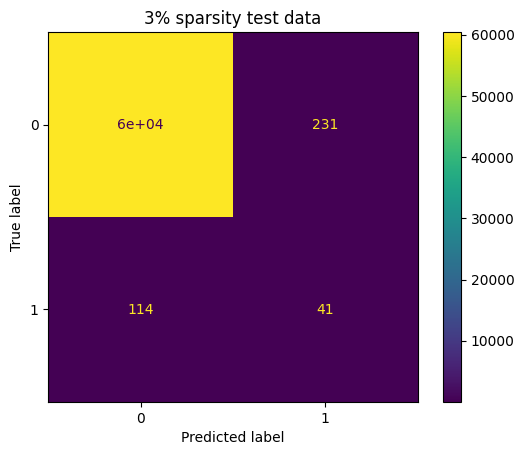

In [98]:
# Baseline Validation set performance and confusion matrix

y_test_pred_3_percent=binary_classifier_3_percent.predict(X_test_3_percent)
test_proba_3_percent= binary_classifier_3_percent.predict_proba(X_test_3_percent)[:,1]

conf_matrix_test_3_percent = confusion_matrix(label_test_3_percent, y_test_pred_3_percent)

cm_display_test_3 = ConfusionMatrixDisplay(conf_matrix_test_3_percent, display_labels = [0, 1])

cm_display_test_3.plot()
cm_display_test_3.ax_.set_title(f"3% sparsity test data")
plt.show()

In [99]:
# 1% sparsity Test Metrics

#Calculate accuracy
accuracy_test_3_pct=accuracy_score(label_test_3_percent, y_test_pred_3_percent)
# Calculate F1 score
f1_test_3_pct = f1_score(label_test_3_percent, y_test_pred_3_percent)

# Calculate precision
precision_test_3_pct = precision_score(label_test_3_percent, y_test_pred_3_percent)

# Calculate recall
recall_test_3_pct = recall_score(label_test_3_percent, y_test_pred_3_percent)

precision_test_3_pct_plt, recall_test_3_pct_plt, _ = precision_recall_curve(label_test_3_percent, y_test_pred_3_percent)

# Calculate AUC-ROC and Average_precision_score
auc_roc_test_3_pct= roc_auc_score(label_test_3_percent, test_proba_3_percent)

average_precision_score_test_3_pct = average_precision_score(label_test_3_percent, test_proba_3_percent)

fpr_test_3_pct, tpr_test_3_pct, _ = roc_curve(label_test_3_percent, test_proba_3_percent)

# Print the results
data_test_3_pct =[['1% Test',accuracy_test_3_pct,f1_test_3_pct,precision_test_3_pct,recall_test_3_pct,auc_roc_test_3_pct,average_precision_score_test_3_pct]]
headers=['Metric for:','Accuracy','F1 score','Precision','Recall','AUROC','AUPRC']
print(tabulate(data_test_3_pct, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Metric for:   │   Accuracy │   F1 score │   Precision │   Recall │    AUROC │    AUPRC │
╞═══════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ 1% Test       │   0.994325 │   0.192037 │    0.150735 │ 0.264516 │ 0.869108 │ 0.105307 │
╘═══════════════╧════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


#### Combined Metric for Inference

In [102]:
# Combined Metrics
#comb=data+data_val+data_test+data_train_1_pct+data_val_1_pct+data_test_1_pct+data_train_5_pct+data_val_5_pct+data_test_5_pct
#comb=data_train_1_pct+data_val_1_pct+data_test_1_pct+data_train_5_pct+data_val_5_pct+data_test_5_pct
comb=data_train_3_pct+data_val_3_pct+data_test_3_pct
baseline_metrics= pd.DataFrame(comb,columns=headers)
baseline_metrics
baseline_metrics.style.set_properties(**{'background-color': 'white',
                           'color': 'black'})

,Metric for:,Accuracy,F1 score,Precision,Recall,AUROC,AUPRC
0,3% Training,0.990028,0.869324,0.960106,0.794227,0.993772,0.947602
1,3% Validation,0.994062,0.181406,0.139860,0.258065,0.827805,0.096216
2,1% Test,0.994325,0.192037,0.150735,0.264516,0.869108,0.105307


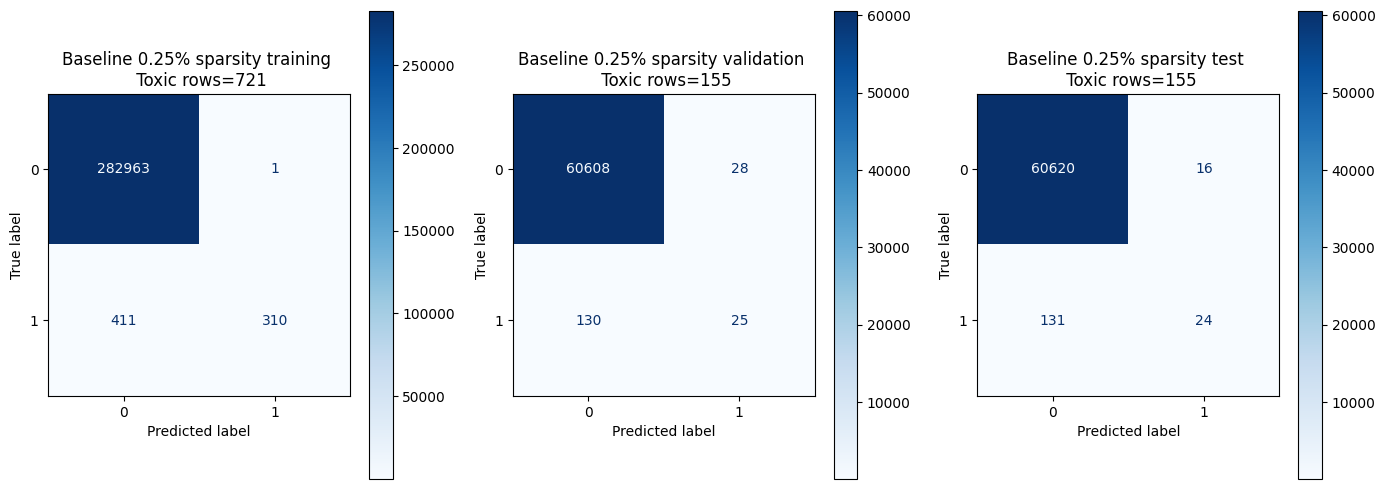

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(1,3,1)
cm_display_b.plot(ax=ax[0],cmap='Blues')
cm_display_b.ax_.set_title(f"Baseline 0.25% sparsity training \n Toxic rows={n_baseline_train_toxic}")
#plt.show()

plt.subplot(1,3,2)
cm_display_val_b.plot(ax=ax[1],cmap='Blues')
cm_display_val_b.ax_.set_title(f"Baseline 0.25% sparsity validation \n Toxic rows={n_baseline_val_toxic}")
#plt.show()

plt.subplot(1,3,3)
cm_display_test_b.plot(ax=ax[2],cmap='Blues')
cm_display_test_b.ax_.set_title(f"Baseline 0.25% sparsity test \n Toxic rows={n_baseline_test_toxic}")

plt.tight_layout()
plt.show()

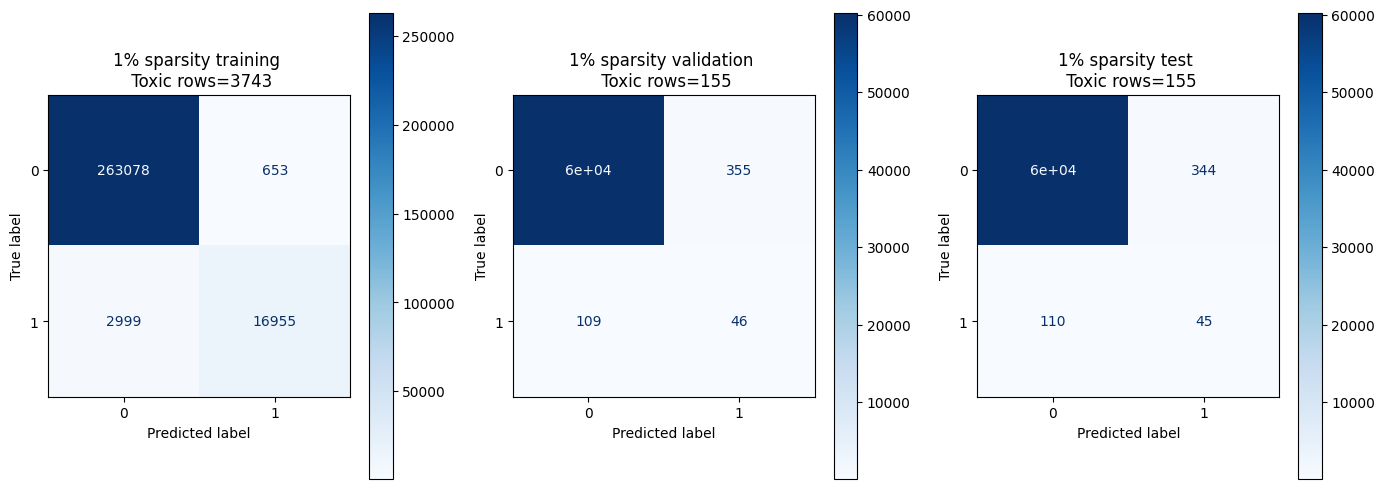

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(1,3,1)
cm_display_train.plot(ax=ax[0],cmap='Blues')
cm_display_train.ax_.set_title(f"1% sparsity training \n Toxic rows={n_1_percent_train_toxic}")
#plt.show()

plt.subplot(1,3,2)
cm_display_val.plot(ax=ax[1],cmap='Blues')
cm_display_val.ax_.set_title(f"1% sparsity validation \n Toxic rows={n_1_percent_val_toxic}")
#plt.show()

plt.subplot(1,3,3)
cm_display_test.plot(ax=ax[2],cmap='Blues')
cm_display_test.ax_.set_title(f"1% sparsity test \n Toxic rows={n_1_percent_test_toxic}")

plt.tight_layout()
plt.show()

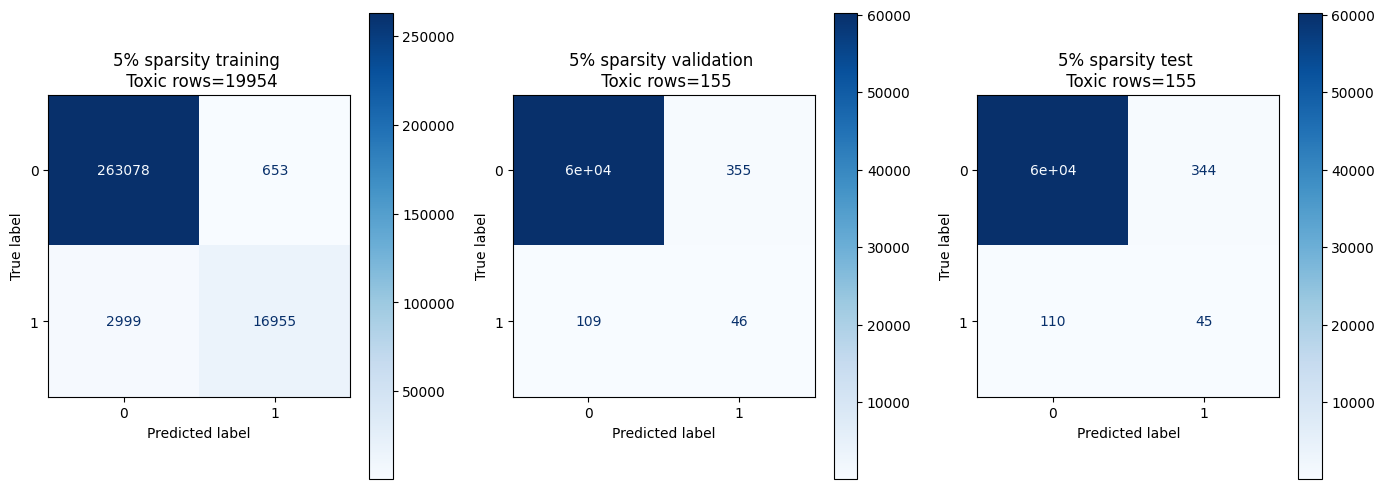

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(1,3,1)
cm_display_train_5.plot(ax=ax[0],cmap='Blues')
cm_display_train_5.ax_.set_title(f"5% sparsity training \n Toxic rows={n_5_percent_train_toxic}")
#plt.show()

plt.subplot(1,3,2)
cm_display_val_5.plot(ax=ax[1],cmap='Blues')
cm_display_val_5.ax_.set_title(f"5% sparsity validation \n Toxic rows={n_5_percent_val_toxic}")
#plt.show()

plt.subplot(1,3,3)
cm_display_test_5.plot(ax=ax[2],cmap='Blues')
cm_display_test_5.ax_.set_title(f"5% sparsity test \n Toxic rows={n_5_percent_test_toxic}")

plt.tight_layout()
plt.show()

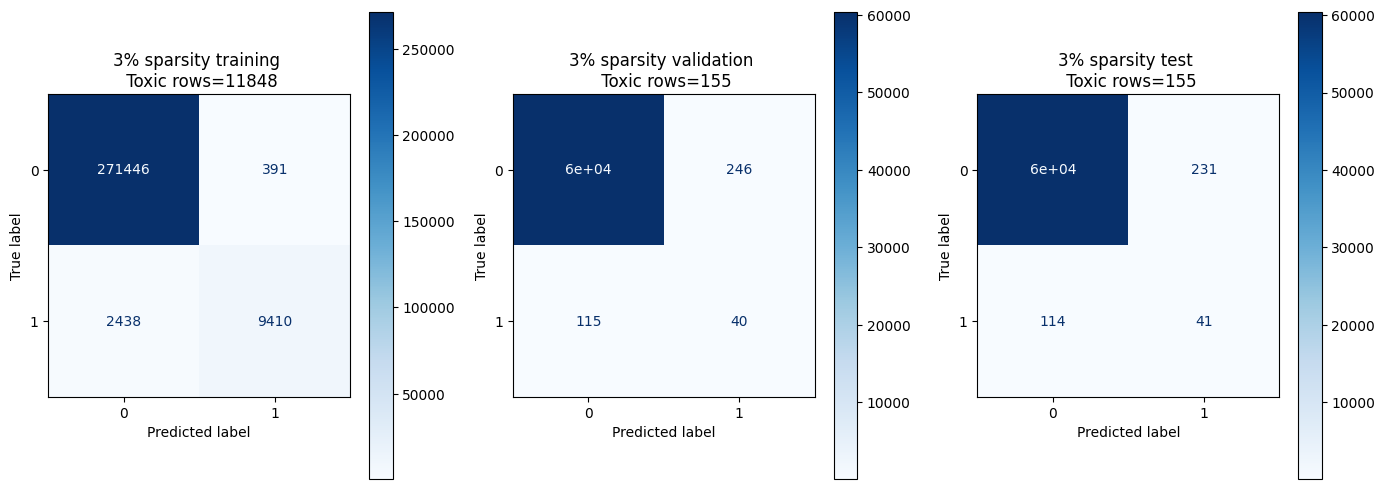

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(1,3,1)
cm_display_train_3.plot(ax=ax[0],cmap='Blues')
cm_display_train_3.ax_.set_title(f"3% sparsity training \n Toxic rows={n_3_percent_train_toxic}")
#plt.show()

plt.subplot(1,3,2)
cm_display_val_3.plot(ax=ax[1],cmap='Blues')
cm_display_val_3.ax_.set_title(f"3% sparsity validation \n Toxic rows={n_3_percent_val_toxic}")
#plt.show()

plt.subplot(1,3,3)
cm_display_test_3.plot(ax=ax[2],cmap='Blues')
cm_display_test_3.ax_.set_title(f"3% sparsity test \n Toxic rows={n_3_percent_test_toxic}")

plt.tight_layout()
plt.show()

AUROC and AUPRC curves for Experiment 2 and 3

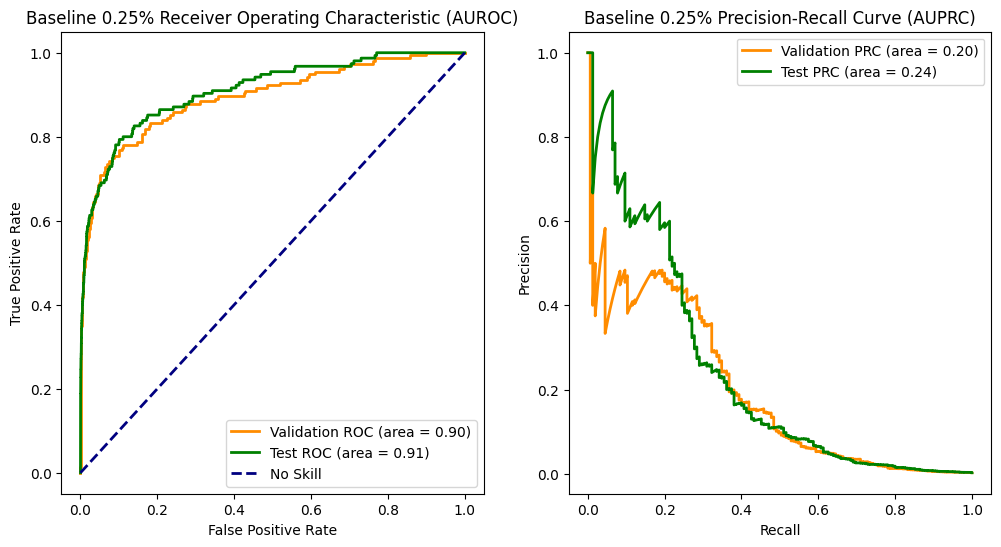

In [38]:
# Plot AUROC
fig=plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(baseline_fpr_val, baseline_tpr_val, color='darkorange', lw=2, label='Validation ROC (area = %0.2f)' % baseline_auc_roc_val)
plt.plot(baseline_fpr_test, baseline_tpr_test, color='green', lw=2, label='Test ROC (area = %0.2f)' % baseline_auc_roc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='No Skill',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline 0.25% Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")

# Plot AUPRC
plt.subplot(1, 2, 2)
plt.plot(baseline_recall_val_plt, baseline_precision_val_plt, color='darkorange',lw=2, label='Validation PRC (area = %0.2f)' % baseline_average_precision_score_val)
plt.plot(baseline_recall_test_plt, baseline_precision_test_plt, color='green',lw=2, label='Test PRC (area = %0.2f)' % baseline_average_precision_score_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Baseline 0.25% Precision-Recall Curve (AUPRC)')
plt.legend(loc="upper right")

# Adjust layout
#plt.tight_layout()

# Show plots
plt.show()

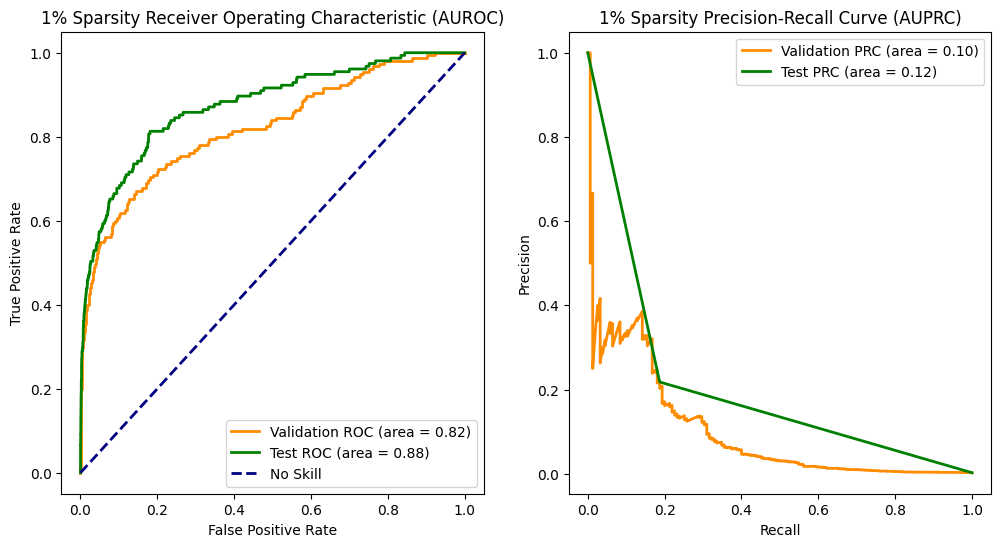

In [39]:
# Plot AUROC
fig=plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_val_1_pct, tpr_val_1_pct, color='darkorange', lw=2, label='Validation ROC (area = %0.2f)' % auc_roc_val_1_pct)
plt.plot(fpr_test_1_pct, tpr_test_1_pct, color='green', lw=2, label='Test ROC (area = %0.2f)' % auc_roc_test_1_pct)
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='No Skill',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'1% Sparsity Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")

# Plot AUPRC
plt.subplot(1, 2, 2)
plt.plot(recall_val_1_pct_plt, precision_val_1_pct_plt, color='darkorange',lw=2, label='Validation PRC (area = %0.2f)' % average_precision_score_val_1_pct)
plt.plot(recall_test_1_pct_plt, precision_test_1_pct_plt, color='green',lw=2, label='Test PRC (area = %0.2f)' % average_precision_score_test_1_pct)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'1% Sparsity Precision-Recall Curve (AUPRC)')
plt.legend(loc="upper right")

# Adjust layout
#plt.tight_layout()

# Show plots
plt.show()

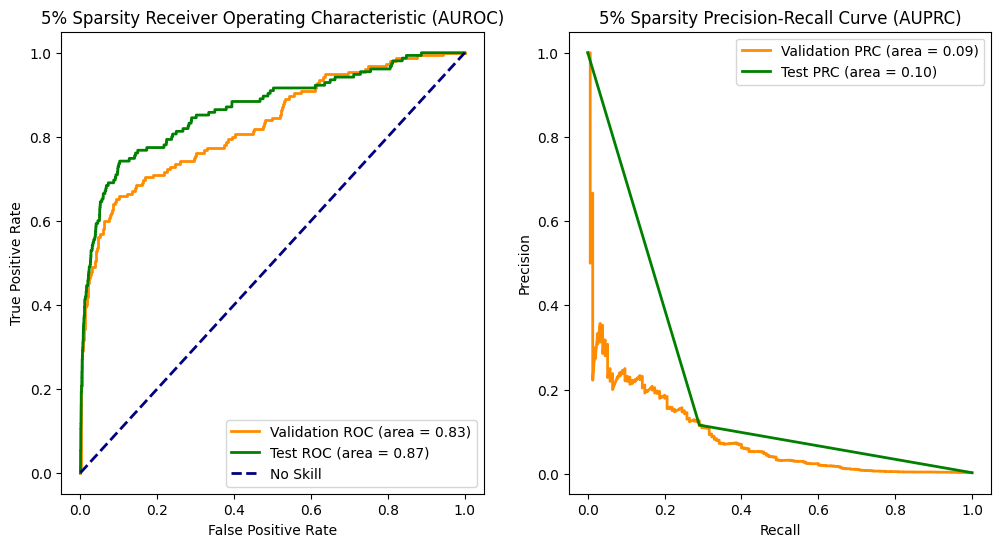

In [78]:
# Plot AUROC
fig=plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_val_5_pct, tpr_val_5_pct, color='darkorange', lw=2, label='Validation ROC (area = %0.2f)' % auc_roc_val_5_pct)
plt.plot(fpr_test_5_pct, tpr_test_5_pct, color='green', lw=2, label='Test ROC (area = %0.2f)' % auc_roc_test_5_pct)
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='No Skill',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'5% Sparsity Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")

# Plot AUPRC
plt.subplot(1, 2, 2)
plt.plot(recall_val_5_pct_plt, precision_val_5_pct_plt, color='darkorange',lw=2, label='Validation PRC (area = %0.2f)' % average_precision_score_val_5_pct)
plt.plot(recall_test_5_pct_plt, precision_test_5_pct_plt, color='green',lw=2, label='Test PRC (area = %0.2f)' % average_precision_score_test_5_pct)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'5% Sparsity Precision-Recall Curve (AUPRC)')
plt.legend(loc="upper right")

# Adjust layout
#plt.tight_layout()

# Show plots
plt.show()

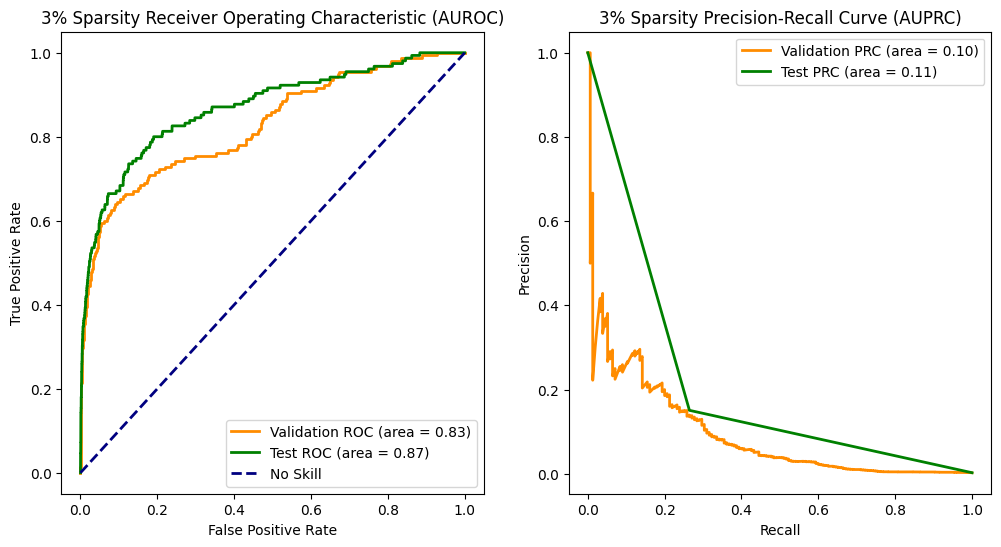

In [103]:
# Plot AUROC
fig=plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_val_3_pct, tpr_val_3_pct, color='darkorange', lw=2, label='Validation ROC (area = %0.2f)' % auc_roc_val_3_pct)
plt.plot(fpr_test_3_pct, tpr_test_3_pct, color='green', lw=2, label='Test ROC (area = %0.2f)' % auc_roc_test_3_pct)
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='No Skill',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'3% Sparsity Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")

# Plot AUPRC
plt.subplot(1, 2, 2)
plt.plot(recall_val_3_pct_plt, precision_val_3_pct_plt, color='darkorange',lw=2, label='Validation PRC (area = %0.2f)' % average_precision_score_val_3_pct)
plt.plot(recall_test_3_pct_plt, precision_test_3_pct_plt, color='green',lw=2, label='Test PRC (area = %0.2f)' % average_precision_score_test_3_pct)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'3% Sparsity Precision-Recall Curve (AUPRC)')
plt.legend(loc="upper right")

# Adjust layout
#plt.tight_layout()

# Show plots
plt.show()